# Load Data

## Source dataset = https://archive.ics.uci.edu/dataset/53/iris
### Dataset Iris

Feature:
1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm

Target: Species

Dengan ke-empat feature tersebut kita akan membuat model untuk menentukan species iris.italicized text

In [110]:
import pandas as pd

iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Take a Quick Look at the Data Structure

Jumlah keseluruhan data pada dataset iris sebanyak 150.

In [111]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Jumlah masing-masing species sama yakni 50.

In [112]:
iris["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [113]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


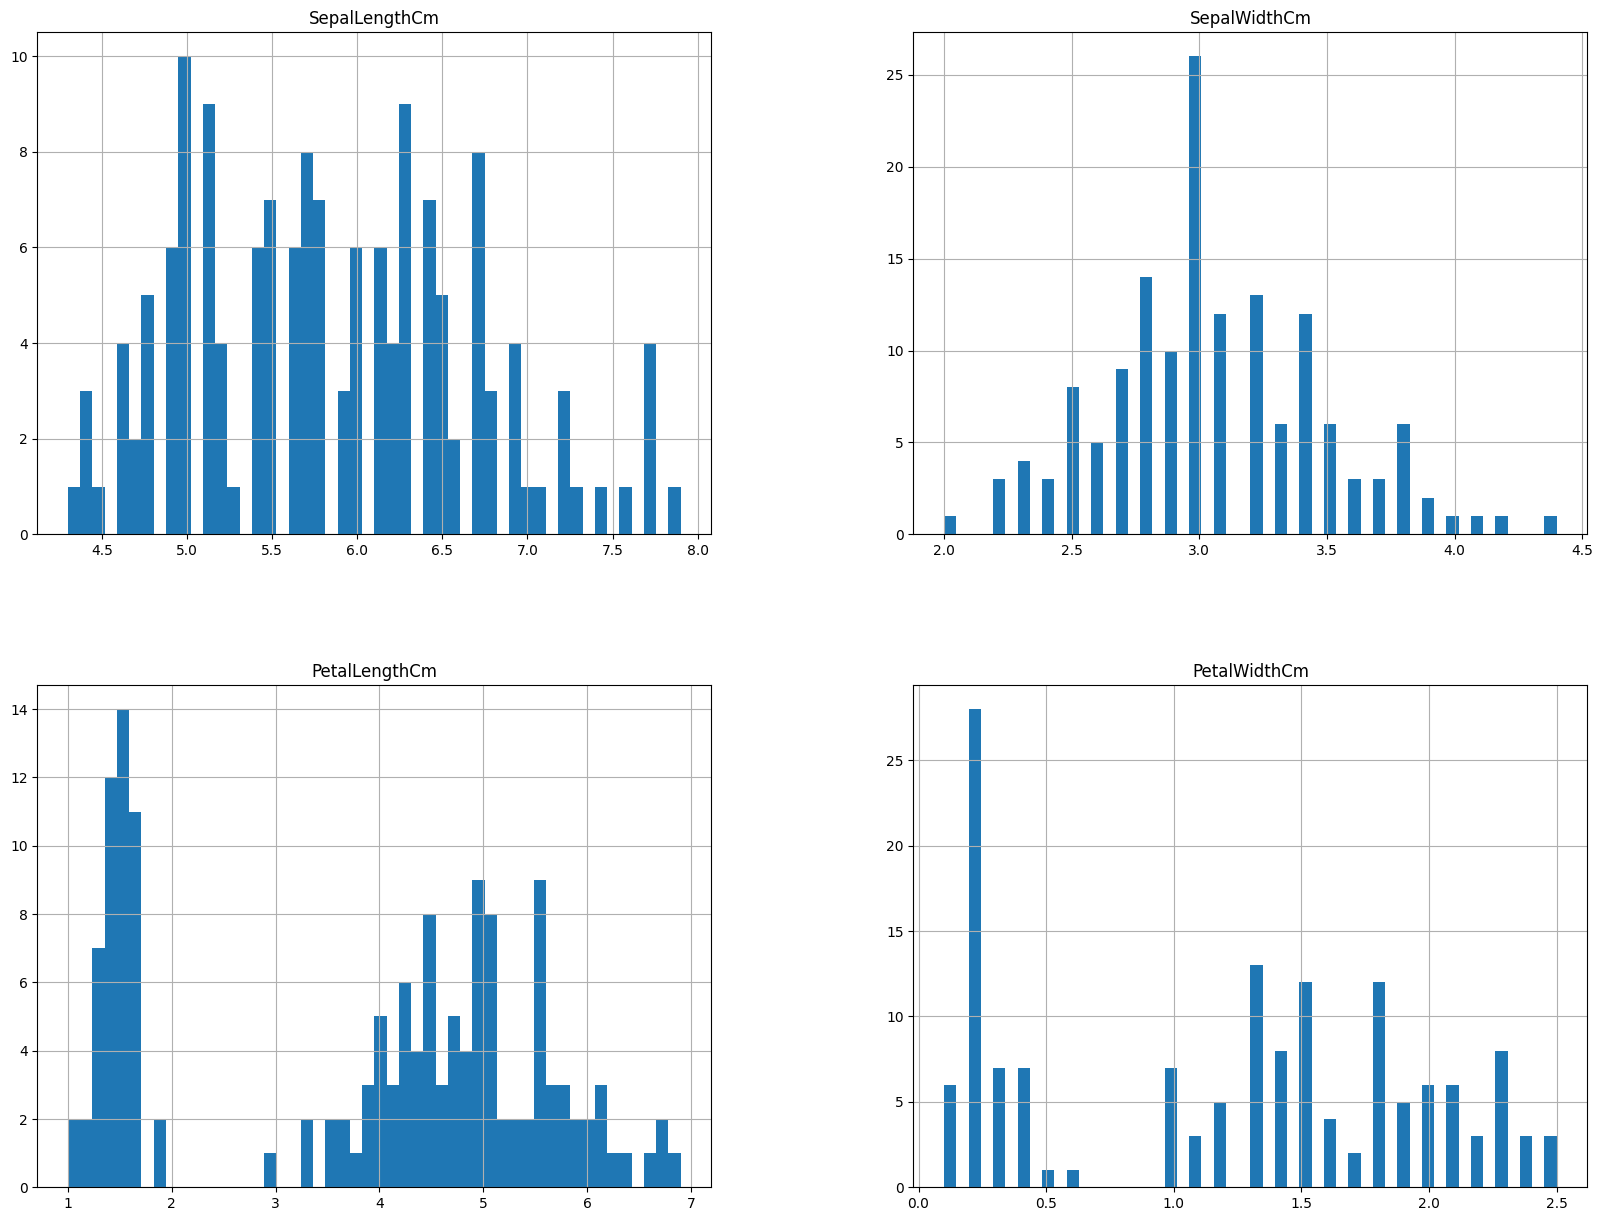

In [114]:
import matplotlib.pyplot as plt

feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

iris[feature].hist(bins=50, figsize=(20,15))
plt.show()

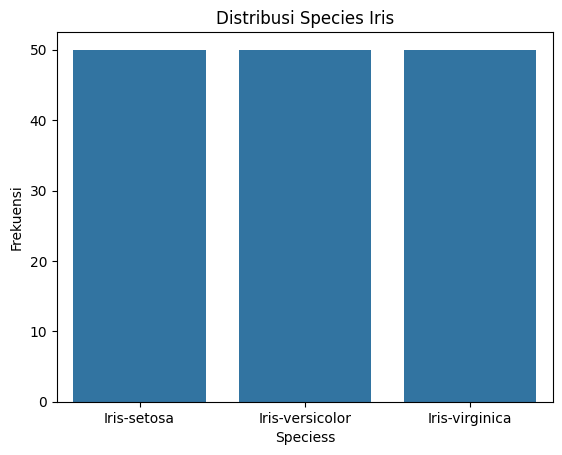

In [115]:
import seaborn as sns
freq = iris['Species'].value_counts()

sns.barplot(x=freq.index, y=freq.values)
plt.xlabel('Speciess')
plt.ylabel('Frekuensi')
plt.title('Distribusi Species Iris')
plt.show()


# Discover and Visualize the Data to Gain Insights

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

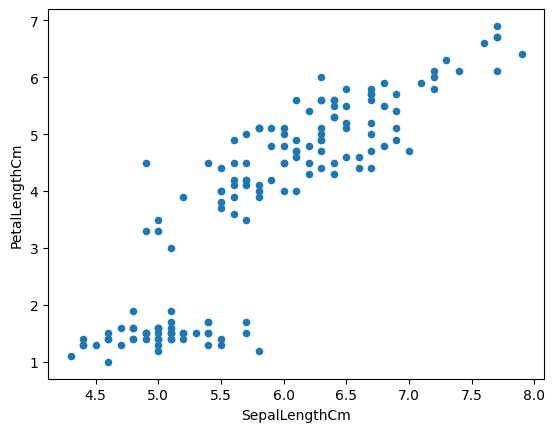

In [116]:
iris.plot(kind="scatter", x="SepalLengthCm", y="PetalLengthCm")

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

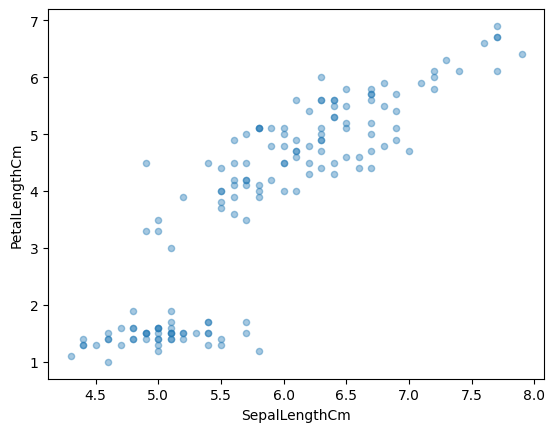

In [117]:
iris.plot(kind="scatter", x="SepalLengthCm", y="PetalLengthCm", alpha=0.4)

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

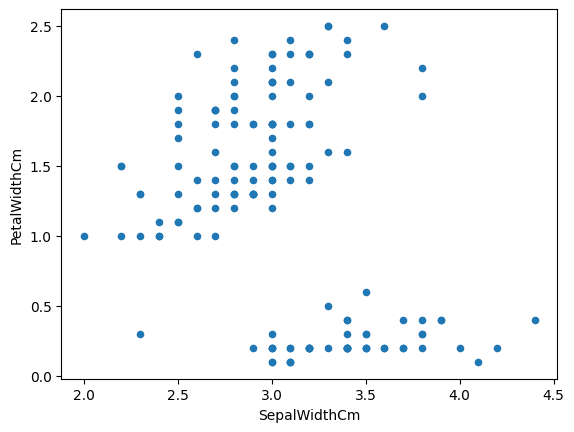

In [118]:
iris.plot(kind="scatter", x="SepalWidthCm", y="PetalWidthCm")

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

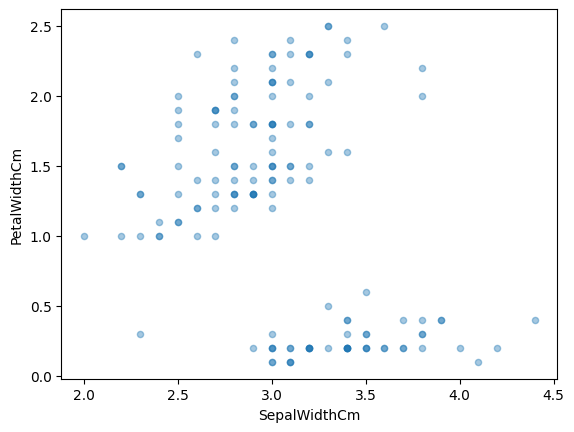

In [119]:
iris.plot(kind="scatter", x="SepalWidthCm", y="PetalWidthCm", alpha=0.4)

# Looking for Correlation

Melakukan encoding pada data target menggunakan one hot encoder untuk melihat korelasi data feature terhadap target.

In [120]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = iris.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(iris[categorical_columns])
one_hot_iris = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))
iris_encoded = pd.concat([iris, one_hot_iris], axis=1)
iris_encoded = iris_encoded.drop(categorical_columns, axis=1)
iris_encoded

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [121]:
corr_matrix = iris_encoded.select_dtypes(include=['number']).corr()
pd.options.display.float_format = '{:.6f}'.format

Untuk Species_Iris-setosa memiliki korelasi pada feature SepalWidthCm.

In [122]:
corr_matrix["Species_Iris-setosa"].sort_values(ascending=False)

,Species_Iris-setosa
Species_Iris-setosa,1.000000
SepalWidthCm,0.595601
Species_Iris-versicolor,-0.500000
Species_Iris-virginica,-0.500000
SepalLengthCm,-0.717416
Id,-0.816515
PetalWidthCm,-0.887510
PetalLengthCm,-0.922688


Untuk Species_Iris-versicolor tidak terlalu memiliki korelasi pada data feature. Korelasi tertinggi species ini terhadap data feature adalah pada feature PetalLengthCm.

In [123]:
corr_matrix["Species_Iris-versicolor"].sort_values(ascending=False)

,Species_Iris-versicolor
Species_Iris-versicolor,1.000000
PetalLengthCm,0.201587
PetalWidthCm,0.118376
SepalLengthCm,0.079396
Id,-0.000000
SepalWidthCm,-0.464700
Species_Iris-setosa,-0.500000
Species_Iris-virginica,-0.500000


Untuk Species_Iris-virginica memiliki korelasi tinggi untuk setiap feature.

In [124]:
corr_matrix["Species_Iris-virginica"].sort_values(ascending=False)

,Species_Iris-virginica
Species_Iris-virginica,1.000000
Id,0.816515
PetalWidthCm,0.769134
PetalLengthCm,0.721102
SepalLengthCm,0.638020
SepalWidthCm,-0.130901
Species_Iris-versicolor,-0.500000
Species_Iris-setosa,-0.500000


array([[<Axes: xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalWidthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>],
       [<Axes: xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <Axes: xlabel='PetalLengthCm', ylabel='PetalL

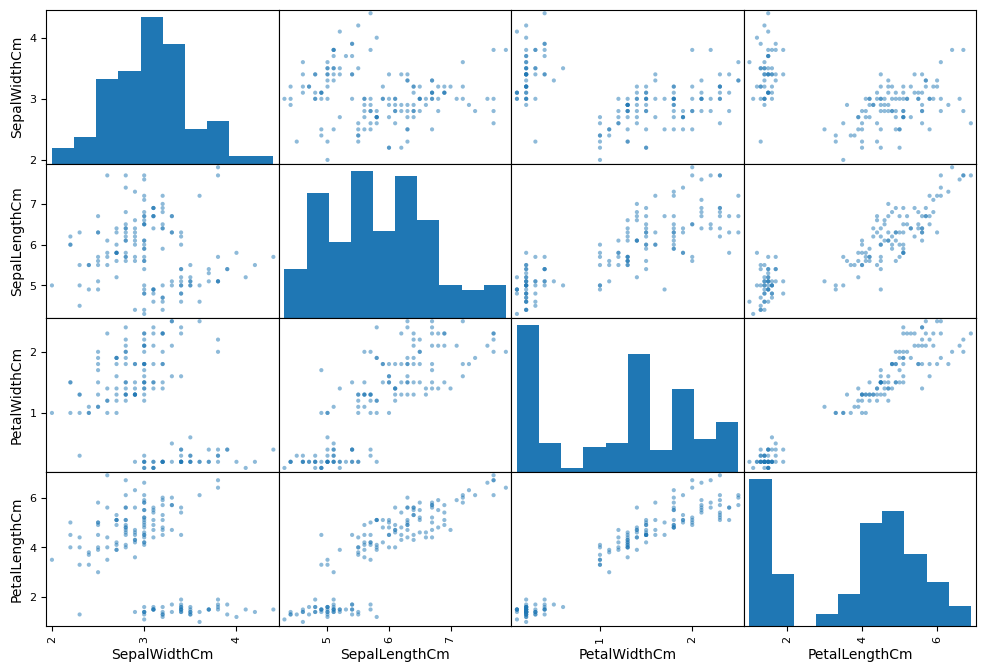

In [125]:
from pandas.plotting import scatter_matrix

attributes = ["SepalWidthCm", "SepalLengthCm", "PetalWidthCm",
              "PetalLengthCm"]
scatter_matrix(iris[attributes], figsize=(12, 8))